In [19]:
#Watershed

import numpy as np
import cv2
from matplotlib import pyplot as plt

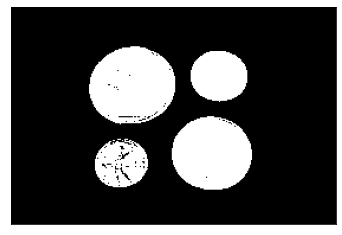

In [21]:
img = cv2.imread('images/coins1.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()

In [3]:
cv2.imwrite("images/waterthresh.jpg",thresh)

True

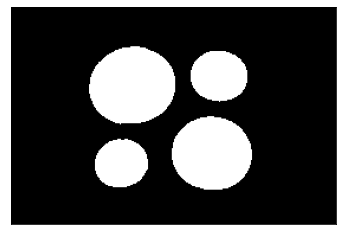

True

In [22]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.imshow(closing,cmap='gray')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()
cv2.imwrite("images/watershedclosed.jpg",closing)

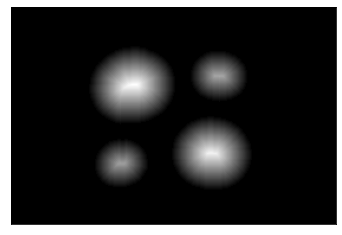

True

In [23]:
dist = cv2.distanceTransform(closing, cv2.DIST_L2, 3)
plt.imshow(dist,cmap='gray')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()
cv2.imwrite("images/waterdist.jpg",dist)

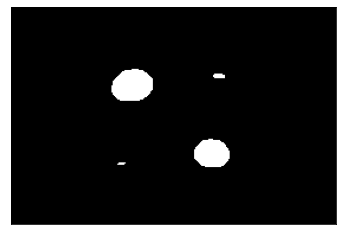

True

In [24]:
ret, dist1 = cv2.threshold(dist, 0.6*dist.max(), 255, 0)
plt.imshow(dist1,cmap='gray')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()
cv2.imwrite("images/waterdist1.jpg",dist1)

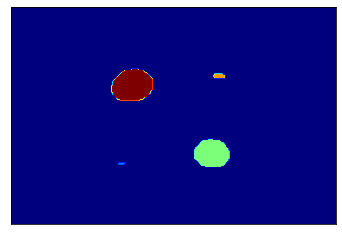

In [26]:
markers = np.zeros(dist.shape, dtype=np.int32)
dist_8u = dist1.astype('uint8')
contours, _ = cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)

plt.imshow(markers,cmap='jet')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()

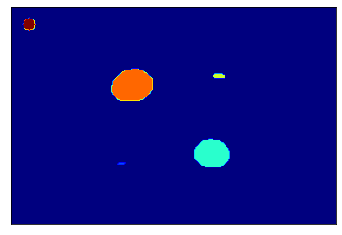

In [28]:
markers = cv2.circle(markers, (15,15), 5, len(contours)+1, -1)
plt.imshow(markers,cmap='jet')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()

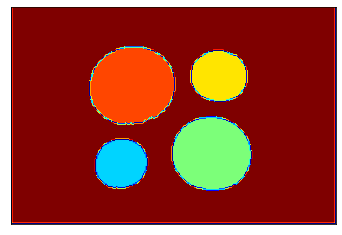

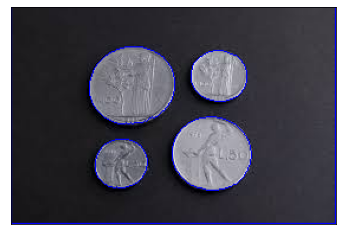

In [31]:
markers = cv2.watershed(img, markers)
plt.imshow(markers,cmap='jet')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()

img[markers == -1] = [0,0,255]

plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()

In [10]:
cv2.imwrite("images/waterimg.jpg",img)

True

In [11]:
cv2.imwrite("images/waterimgmarkers.jpg",markers)

True

In [12]:
markers

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  5,  5, ...,  5,  5, -1],
       [-1,  5,  5, ...,  5,  5, -1],
       ...,
       [-1,  5,  5, ...,  5,  5, -1],
       [-1,  5,  5, ...,  5,  5, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('images/water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

cv2.imwrite("images/waterimg2.jpg",markers)

True

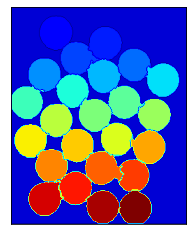

In [18]:




plt.imshow(markers,cmap='jet')
plt.xticks([]), plt.yticks([]) # X ve y eksenleri göstermemek için []  yapılır
plt.show()

In [ ]:
cv2.cor